## ANN for 2 layer MCX data fitting HHB2

In [6]:
import pandas as pd
import glob
import os
import numpy as np

### Simulation data

In [9]:
csv_folder = 'C:/Users/Haiya/2layer_sim/MCX_bbnirs_simulation_2layer/simulations/2layer_simlulation/sim_results/1_4/'
GT_folder = 'C:/Users/Haiya/2layer_sim/MCX_bbnirs_simulation_2layer/simulations/2layer_simlulation/data_generation/split_files/'

In [11]:
csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))
df_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [13]:
df_all.head()

,ID,20_784,20_800,20_818,20_835,20_851,20_868,20_881,20_894,25_784,...,30_881,30_894,35_784,35_800,35_818,35_835,35_851,35_868,35_881,35_894
0,101,75499.734,76986.650,77899.240,78791.625,79139.920,79836.820,80580.980,81832.086,25507.576,...,10068.695,10152.1360,3949.3690,4048.0894,4143.7550,4256.9897,4159.1143,4144.4834,4113.4844,4083.2405
1,102,76500.390,77988.670,78893.180,79773.336,80103.850,80795.870,81566.516,82815.310,26239.656,...,10537.013,10617.5420,4244.6220,4360.3535,4436.9970,4565.1520,4446.7974,4436.3270,4397.2210,4379.6333
2,103,63592.810,65200.523,66128.890,67062.470,67278.040,67874.664,68511.230,69529.710,18393.578,...,6217.996,6252.9946,1888.6782,2035.0511,2083.4075,2139.9517,2115.3296,2119.4966,2073.8274,2006.7003
3,104,68399.320,69971.040,70894.664,71848.850,72125.590,72767.910,73452.040,74597.890,20966.748,...,7505.041,7556.8400,2488.4019,2612.4304,2698.7390,2781.7890,2737.2827,2733.0894,2690.5432,2627.5483
4,105,71691.730,73218.800,74165.914,75096.610,75420.734,76104.200,76797.375,78015.480,22944.932,...,8577.930,8646.8040,3053.2383,3152.7964,3262.0469,3364.6243,3300.4792,3279.8801,3247.9585,3196.4658


In [15]:
csv_files = glob.glob(os.path.join(GT_folder, '*.csv'))
GT_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [17]:
GT_all.head

<bound method NDFrame.head of           ID  HBO1  HHB1  HBO2  HHB2  Thickness  complete
0          1   5.0   2.5    25    15         10     False
1          2   5.0   2.5    25    15         12     False
2          3   5.0   2.5    25    15         14     False
3          4   5.0   2.5    25    15         16     False
4          5   5.0   2.5    25    15         18     False
...      ...   ...   ...   ...   ...        ...       ...
87841  87842  20.0  12.5    55    35         12     False
87842  87843  20.0  12.5    55    35         14     False
87843  87844  20.0  12.5    55    35         16     False
87844  87845  20.0  12.5    55    35         18     False
87845  87846  20.0  12.5    55    35         20     False

[87846 rows x 7 columns]>

### Merge data

In [21]:
GT_all['ID'] = GT_all['ID'].astype(int)
df_all['ID'] = df_all['ID'].astype(int)
GT_all = GT_all.sort_values('ID').reset_index(drop=True)
df_all = df_all.sort_values('ID').reset_index(drop=True)

In [23]:
merged_df = pd.merge(df_all, GT_all, on='ID', how='inner')

In [25]:
merged_df.head

<bound method NDFrame.head of       ID     20_784     20_800     20_818     20_835     20_851     20_868  \
0      1  66385.830  67754.170  68516.484  69343.470  69514.664  70078.760   
1      2  70293.180  71699.830  72514.610  73381.010  73629.234  74246.310   
2      3  72967.770  74388.445  75256.280  76124.320  76423.640  77083.734   
3      4  74789.850  76211.440  77096.280  77962.164  78288.170  78973.410   
4      5  76013.350  77465.766  78348.610  79210.720  79539.670  80225.460   
..   ...        ...        ...        ...        ...        ...        ...   
105  106  73929.250  75414.060  76355.430  77267.360  77618.240  78322.570   
106  107  75430.086  76924.530  77843.220  78740.630  79092.100  79790.750   
107  108  76453.340  77946.420  78854.914  79738.800  80071.490  80764.900   
108  109  63273.727  64918.380  65873.080  66822.670  67046.290  67648.110   
109  110  68182.760  69780.030  70720.980  71687.820  71969.620  72615.766   

        20_881     20_894     25_

In [27]:
X = merged_df[df_all.columns.difference(['ID'])]
Y = merged_df[['HBO1', 'HHB1', 'HBO2', 'HHB2', 'Thickness']]

In [29]:
X

,20_784,20_800,20_818,20_835,20_851,20_868,20_881,20_894,25_784,25_800,...,30_881,30_894,35_784,35_800,35_818,35_835,35_851,35_868,35_881,35_894
0,66385.830,67754.170,68516.484,69343.470,69514.664,70078.760,70730.190,71795.580,19970.965,20491.635,...,6846.7305,6889.5620,2290.6636,2398.9750,2432.2776,2486.6145,2434.6934,2429.3196,2383.8310,2320.5745
1,70293.180,71699.830,72514.610,73381.010,73629.234,74246.310,74937.610,76108.840,22145.627,22692.096,...,8009.5625,8068.4460,2843.9932,2935.9368,3003.1157,3082.5007,3015.3208,3002.5537,2959.1638,2902.5244
2,72967.770,74388.445,75256.280,76124.320,76423.640,77083.734,77785.610,79015.070,23798.281,24341.580,...,8965.1650,9037.9420,3347.8254,3426.8560,3513.3704,3610.5857,3529.1533,3504.7769,3468.7659,3423.8990
3,74789.850,76211.440,77096.280,77962.164,78288.170,78973.410,79691.000,80952.250,25007.436,25541.613,...,9704.5100,9785.3130,3773.1782,3852.4807,3943.0500,4048.5056,3954.5144,3930.2812,3892.0156,3857.8848
4,76013.350,77465.766,78348.610,79210.720,79539.670,80225.460,80971.630,82226.086,25883.992,26397.557,...,10260.9790,10344.4410,4108.5396,4202.6530,4281.2120,4391.5635,4282.5390,4268.7144,4230.3813,4206.0290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,73929.250,75414.060,76355.430,77267.360,77618.240,78322.570,79033.170,80291.980,24397.893,24989.621,...,9414.7390,9493.6490,3540.8984,3630.0808,3744.0698,3853.5380,3775.4907,3750.9380,3718.5469,3677.1243
106,75430.086,76924.530,77843.220,78740.630,79092.100,79790.750,80534.555,81785.305,25456.928,26005.832,...,10046.2810,10129.6690,3928.5713,4028.7173,4127.1360,4241.0117,4144.7500,4130.1540,4099.9520,4069.0125
107,76453.340,77946.420,78854.914,79738.800,80071.490,80764.900,81535.840,82783.990,26204.559,26733.160,...,10520.8180,10601.2360,4228.6200,4345.5063,4424.2500,4553.2734,4435.9280,4425.3706,4387.1597,4369.0430
108,63273.727,64918.380,65873.080,66822.670,67046.290,67648.110,68283.140,69296.260,18218.875,18893.195,...,6156.4610,6190.5835,1847.3159,1998.5801,2049.0132,2106.2173,2084.6982,2090.0227,2044.2448,1976.7905


In [31]:
Y

,HBO1,HHB1,HBO2,HHB2,Thickness
0,5.0,2.5,25,15,10
1,5.0,2.5,25,15,12
2,5.0,2.5,25,15,14
3,5.0,2.5,25,15,16
4,5.0,2.5,25,15,18
...,...,...,...,...,...
105,5.0,2.5,28,27,16
106,5.0,2.5,28,27,18
107,5.0,2.5,28,27,20
108,5.0,2.5,28,29,10


In [33]:
X = X.to_numpy()
Y = Y.to_numpy()

In [37]:
Y = Y[:, 3]   # Assuming column 3 is HHB₂
Y = Y.reshape(-1, 1)  # Make it (n_samples, 1) shape for regression

IndexError: index 3 is out of bounds for axis 1 with size 1

### ANN based on pytorch

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [41]:
# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Custom PyTorch dataset
class MCXSimDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# Create DataLoaders
train_loader = DataLoader(MCXSimDataset(X_train, Y_train), batch_size=4, shuffle=True)
test_loader = DataLoader(MCXSimDataset(X_test, Y_test), batch_size=1, shuffle=False)

In [64]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(32, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),

            nn.Linear(1024, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),

            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),

            nn.Linear(2048, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),

            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = ANN()

### Model training

In [81]:
#criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss(beta=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [83]:
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/500, Loss: 4.3689
Epoch 2/500, Loss: 4.4779
Epoch 3/500, Loss: 4.4399
Epoch 4/500, Loss: 4.4466
Epoch 5/500, Loss: 4.4518
Epoch 6/500, Loss: 4.6231
Epoch 7/500, Loss: 4.3555
Epoch 8/500, Loss: 4.6838
Epoch 9/500, Loss: 4.5022
Epoch 10/500, Loss: 4.3886
Epoch 11/500, Loss: 4.0718
Epoch 12/500, Loss: 4.2592
Epoch 13/500, Loss: 3.8365
Epoch 14/500, Loss: 3.7543
Epoch 15/500, Loss: 4.5417
Epoch 16/500, Loss: 4.2565
Epoch 17/500, Loss: 3.9399
Epoch 18/500, Loss: 3.7617
Epoch 19/500, Loss: 3.9496
Epoch 20/500, Loss: 3.8817
Epoch 21/500, Loss: 3.6622
Epoch 22/500, Loss: 3.5725
Epoch 23/500, Loss: 3.7237
Epoch 24/500, Loss: 3.6372
Epoch 25/500, Loss: 3.6143
Epoch 26/500, Loss: 3.6704
Epoch 27/500, Loss: 3.6454
Epoch 28/500, Loss: 3.4834
Epoch 29/500, Loss: 3.3894
Epoch 30/500, Loss: 3.6337
Epoch 31/500, Loss: 3.1941
Epoch 32/500, Loss: 3.6059
Epoch 33/500, Loss: 3.6308
Epoch 34/500, Loss: 3.9422
Epoch 35/500, Loss: 3.7346
Epoch 36/500, Loss: 3.3615
Epoch 37/500, Loss: 3.7868
Epoch 38/5

In [84]:
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    total_mse = 0
    for batch_X, batch_Y in test_loader:
        preds = model(batch_X)
        print('preds=', preds)
        print('GT   =', batch_Y)
        print('---------')
        all_preds.append(preds.numpy())
        all_targets.append(batch_Y.numpy())
        mse = criterion(preds, batch_Y)
        total_mse += mse.item()
    print(f"Test MSE: {total_mse / len(test_loader):.4f}")

preds= tensor([[19.3820]])
GT   = tensor([[19.]])
---------
preds= tensor([[19.2553]])
GT   = tensor([[17.]])
---------
preds= tensor([[18.6729]])
GT   = tensor([[15.]])
---------
preds= tensor([[21.3767]])
GT   = tensor([[21.]])
---------
preds= tensor([[23.9006]])
GT   = tensor([[35.]])
---------
preds= tensor([[20.4394]])
GT   = tensor([[15.]])
---------
preds= tensor([[25.8576]])
GT   = tensor([[25.]])
---------
preds= tensor([[22.7398]])
GT   = tensor([[29.]])
---------
preds= tensor([[24.3781]])
GT   = tensor([[25.]])
---------
preds= tensor([[18.8384]])
GT   = tensor([[17.]])
---------
preds= tensor([[20.8522]])
GT   = tensor([[19.]])
---------
Test MSE: 2.6930


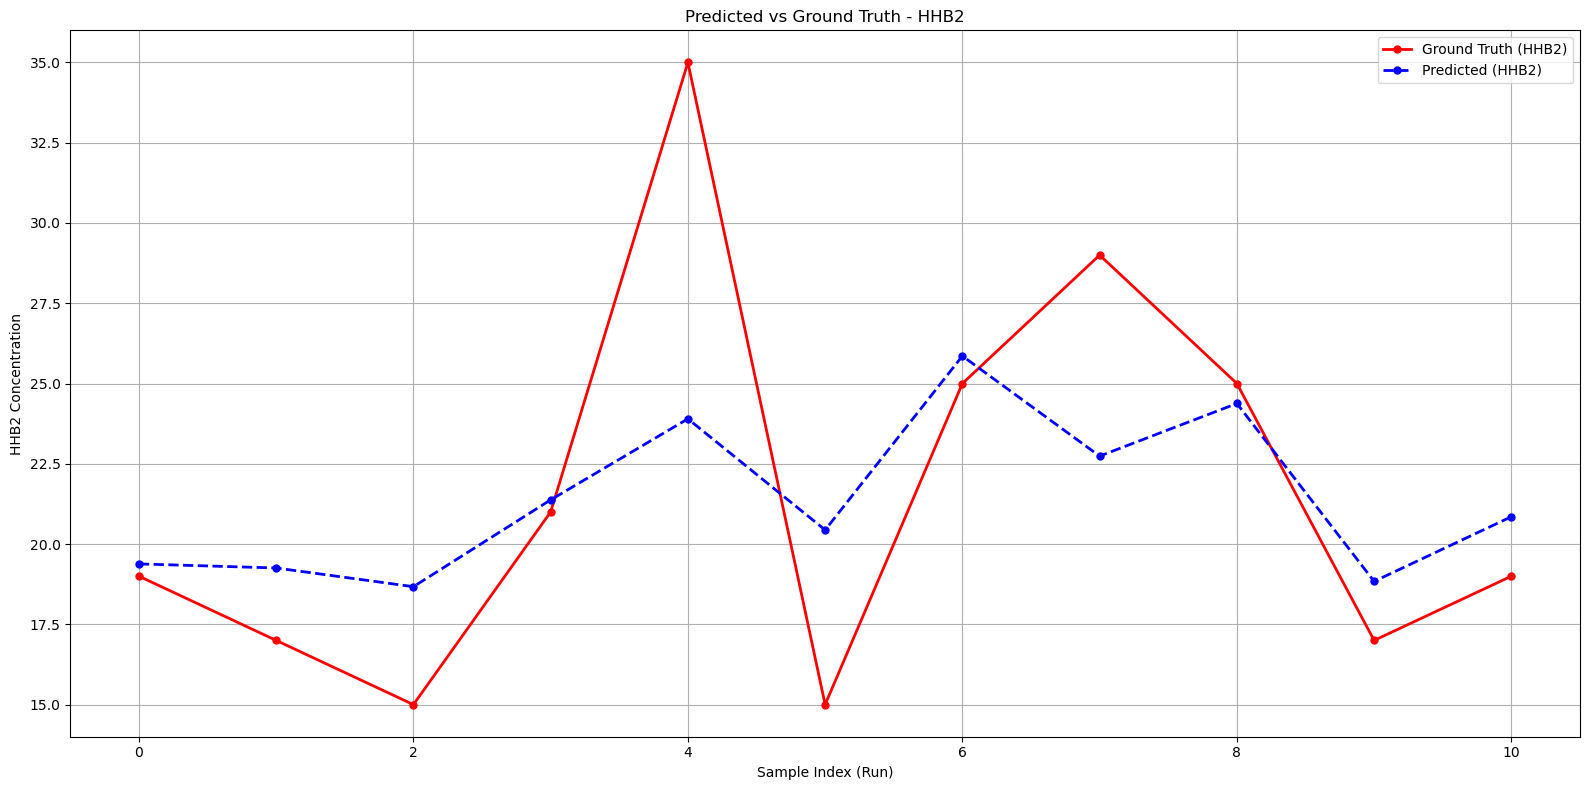

In [125]:
import matplotlib.pyplot as plt
import numpy as np
all_preds = np.array(all_preds).squeeze(1).squeeze(1)
all_targets = np.array(all_targets).squeeze(1).squeeze(1)

plt.figure(figsize=(16, 8))

plt.plot(all_targets, label='Ground Truth (HHB2)', color='red', linewidth=2, marker='o', markersize=5)
plt.plot(all_preds, label='Predicted (HHB2)', color='blue', linestyle='--', linewidth=2, marker='o', markersize=5)

plt.xlabel('Sample Index (Run)')
plt.ylabel('HHB2 Concentration')
plt.title('Predicted vs Ground Truth - HHB2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### XGBoost

In [100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=8, learning_rate=0.05)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [101]:
y_preds = np.column_stack([model.predict(X_test)])
mse = np.mean((y_preds - y_test)**2, axis=0)

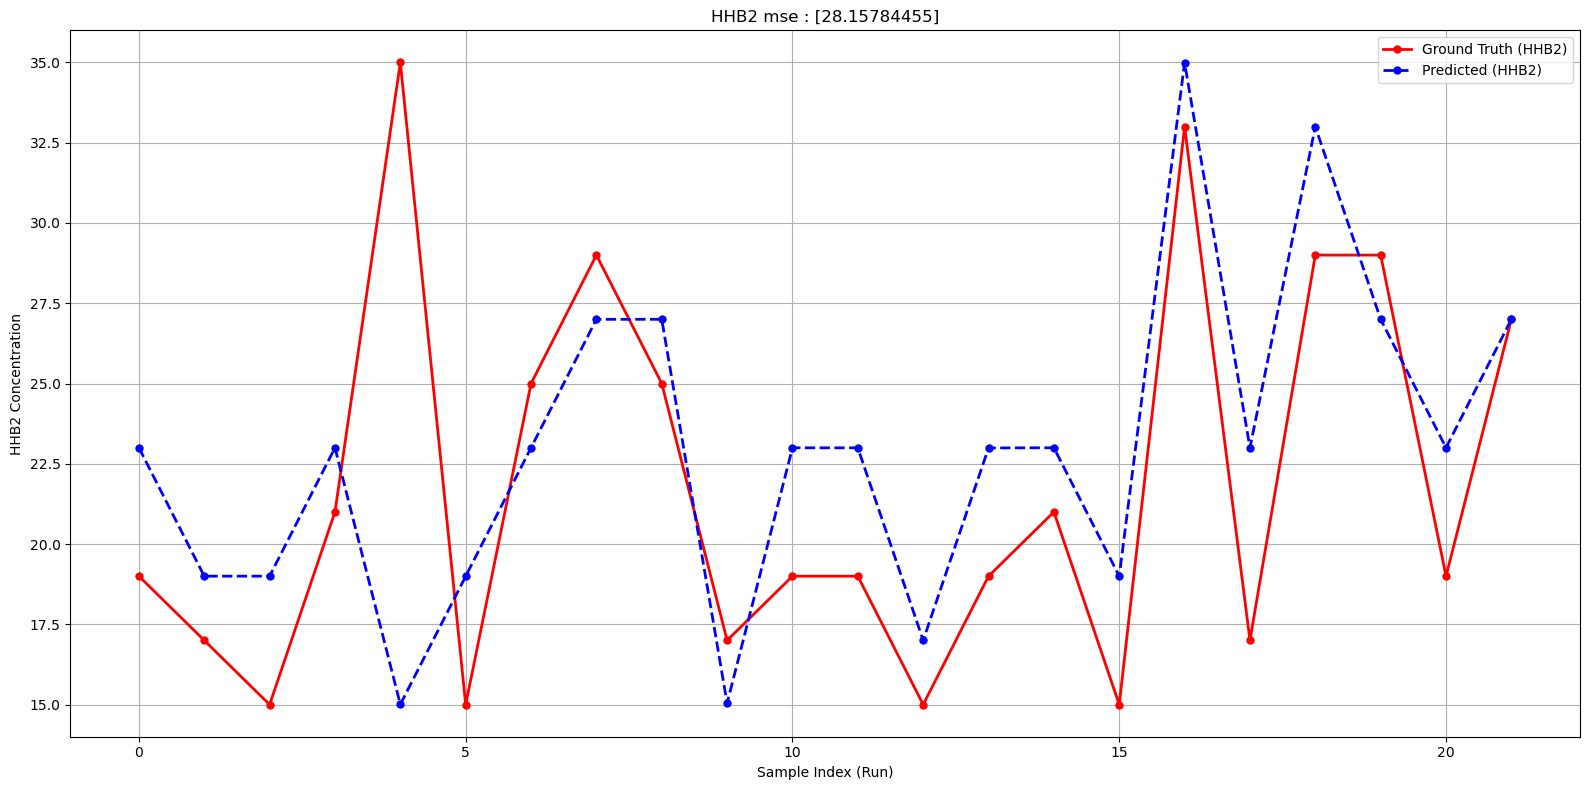

In [117]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 8))

plt.plot(y_test, label='Ground Truth (HHB2)', color='red', linewidth=2, marker='o', markersize=5)
plt.plot(y_preds, label='Predicted (HHB2)', color='blue', linestyle='--', linewidth=2, marker='o', markersize=5)

plt.xlabel('Sample Index (Run)')
plt.ylabel('HHB2 Concentration')
plt.title(f'HHB2 mse : {mse}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()